In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mand

In [69]:
# frame parameters
WIDTH = 10
ASPECT_RATIO = 3 / 4
MAND_WIDTH = 3.4
MAX_ITTERATIONS = 10

HEIGHT = round(WIDTH / ASPECT_RATIO)
MAND_HEIGHT = MAND_WIDTH * ASPECT_RATIO

START_X = -0.65 - MAND_WIDTH / 2
START_Y = 0 + MAND_HEIGHT / 2

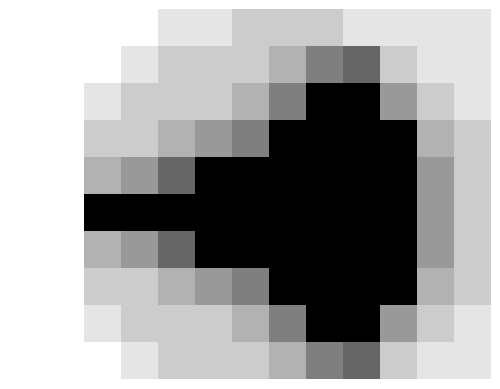

In [70]:

final_image = np.zeros((WIDTH, HEIGHT, 3), dtype=np.uint8)

for row in range(WIDTH):
    for col in range(HEIGHT):
        x = START_X + col * MAND_WIDTH / HEIGHT
        y = START_Y - row * MAND_HEIGHT / WIDTH

        itterations = mand.calculate_mandelbrot(x, y, MAX_ITTERATIONS)
        final_image[row, col] = (1 - np.array([itterations, itterations, itterations])) * 255

plt.imshow(final_image)
plt.axis('off')
plt.show()


In [56]:
MAND_HEIGHT

4.533333333333333